 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [490]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [491]:
# Reading whale returns
whale_df=pd.read_csv('./Resources/whale_returns.csv',parse_dates=True)   #read in csv
whale_df=whale_df.set_index('Date').sort_values(axis=0,by='Date')        #change index to Date
whale_df.index=pd.to_datetime(whale_df.index) 

In [492]:
# Count nulls
whale_df.isnull().value_counts()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC
False                      False               False                        False                     1059
True                       True                True                         True                         1
Name: count, dtype: int64

In [493]:
# Drop nulls
whale_df=whale_df.dropna()                              #removing nulls
whale_df.isnull().value_counts()                        #confirm removal of nulls


SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC
False                      False               False                        False                     1059
Name: count, dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [494]:
# Reading algorithmic returns
algo_df=pd.read_csv('./Resources/algo_returns.csv',parse_dates=True)     # read in algo returns
algo_df=algo_df.set_index('Date').sort_values(axis=0,by='Date')          # change index to dates
algo_df.index=pd.to_datetime(algo_df.index) 

In [495]:
# Count nulls
algo_df.isnull().value_counts()                         #check for nulls

Algo 1  Algo 2
False   False     1235
        True         6
Name: count, dtype: int64

In [496]:
# Drop nulls
algo_df=algo_df.dropna()                                #removing nulls
algo_df.isnull().value_counts()                         #confirm removal of nulls


Algo 1  Algo 2
False   False     1235
Name: count, dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [497]:
# Reading S&P 500 Closing Prices
sp500_df=pd.read_csv('./Resources/sp500_history.csv')   #read in sp500 history
sp500_df=sp500_df.set_index('Date')                     #set index to Date column

In [498]:
# Check Data Types
print(type(sp500_df.index[0]))                          #check datatype for the dates (needs to be DateTime)
print(type(sp500_df['Close'][0]))                       #check datatype for close (needs to be float)

<class 'str'>
<class 'str'>


In [499]:
# Fix Data Types
sp500_df.index=pd.to_datetime(sp500_df.index,format="%d-%b-%y")           #convert string to DateTime
sp500_df['Close']=sp500_df['Close'].str.strip('$')      #strip off $ symbol from close string to allow conver to numeric
sp500_df['Close']=pd.to_numeric(sp500_df['Close'])      #convert close string to float
print(type(sp500_df.index[0]))                          #confirm DateTime format
print(type(sp500_df['Close'][0]))                       #confirm float format

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.float64'>


In [500]:
# Calculate Daily Returns
sp500_df=sp500_df.sort_values(axis=0,by='Date')             #sorting by Date to allow pct_change to work properly
sp500_df['daily_returns']=sp500_df['Close'].pct_change()    #calculate daily returns on S&P500 close
sp500_df=sp500_df.drop('Close',axis=1)                      #dropping Close data from the DF

In [501]:
# Drop nulls
sp500_df=sp500_df.dropna()             #drop off nulls from pct_change function
sp500_df.isnull().value_counts()       #confirm nulls removed

daily_returns
False            1648
Name: count, dtype: int64

In [502]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df=sp500_df.rename(columns={'daily_returns':'sp500_daily_returns'}) #rename columns to be specific
sp500_df

,sp500_daily_returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [503]:
#print(type(whale_df.index[0])) 
#print(type(algo_df.index[0])) 
#print(type(sp500_df.index[0])) 

# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = whale_df.join(algo_df)                #join whale and alglorithmic dataframes
#join combined and sp500 dataframes
combined_df = combined_df.join(sp500_df,on='Date',how='left').dropna() 
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_daily_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Returns for Various Funds'}, xlabel='Date'>

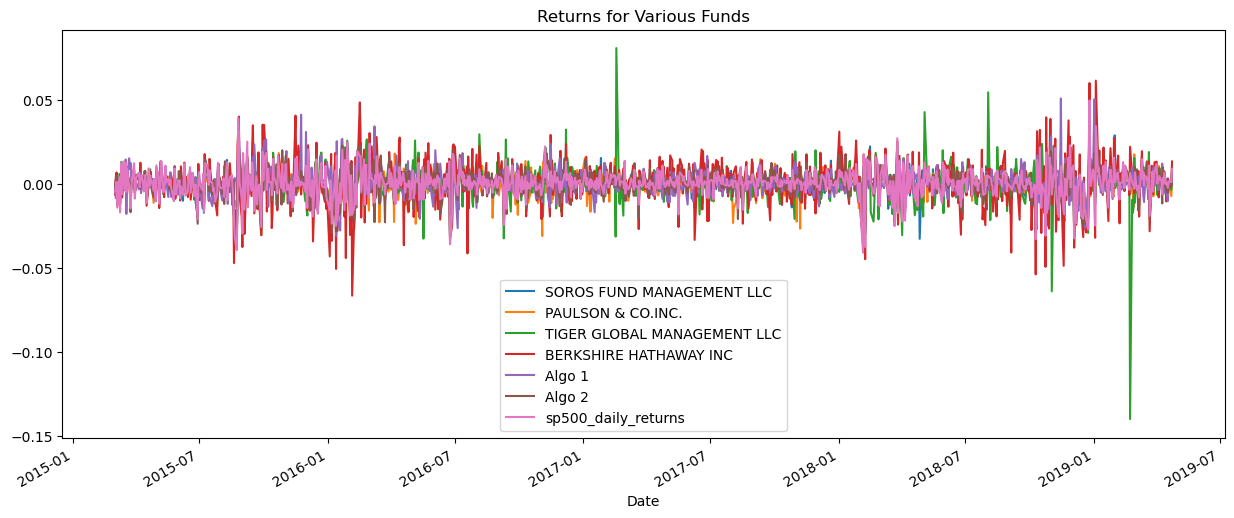

In [504]:
# Plot daily returns of all portfolios
combined_df.plot(title='Returns for Various Funds',figsize=[15,6])

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

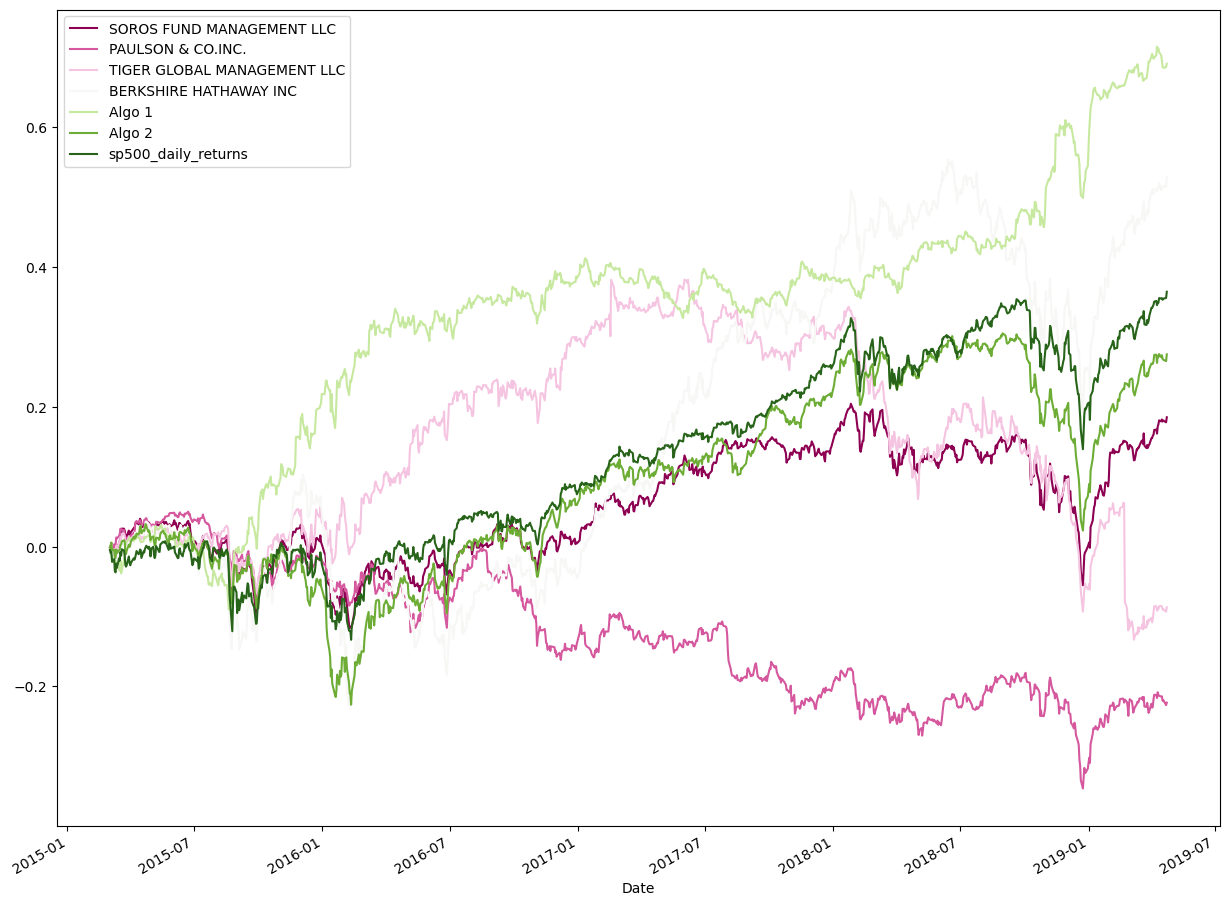

In [505]:
# Calculate cumulative returns of all portfolios
cumulative_combined_df=combined_df.cumsum()
# Plot cumulative returns
cumulative_combined_df.plot(figsize=[15,12],colormap='PiYG')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

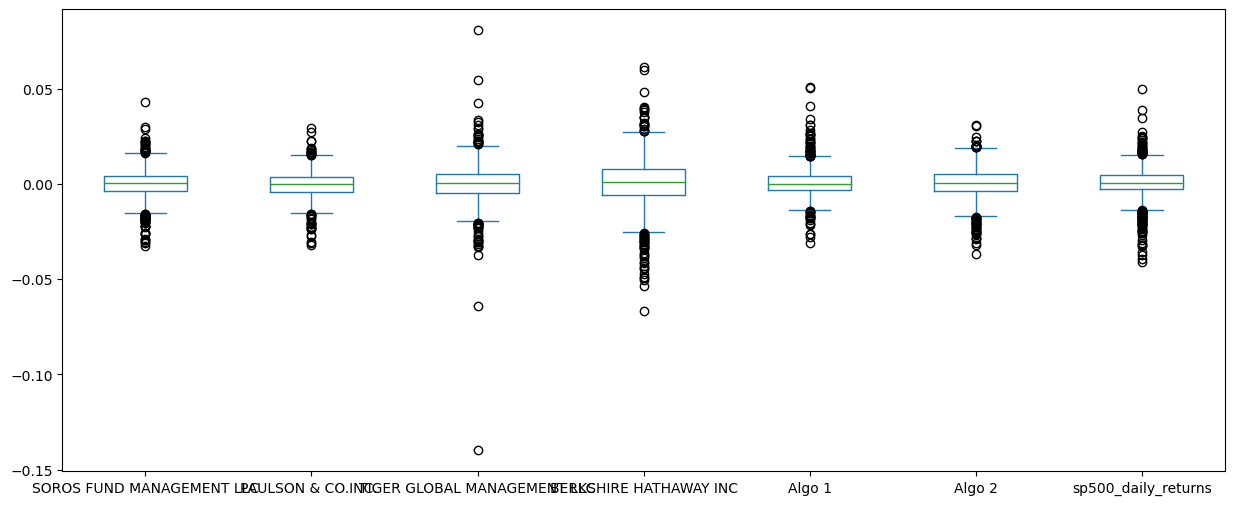

In [506]:
# Box plot to visually show risk
combined_df.plot(kind='box',figsize=[15,6])

### Calculate Standard Deviations

In [507]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500_daily_returns            0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [508]:
# Calculate  the daily standard deviation of S&P 500
print("For the S&P 500, the standard deviation is ",round(combined_df['sp500_daily_returns'].std(),5))
# Determine which portfolios are riskier than the S&P 500
# Create a Series to hold the covariances
covariance=pd.Series(index=combined_df.columns)
# Creating a FOR loop to calculate the covariance 
for each in combined_df.columns:
    covariance[each]=combined_df[each].cov(combined_df['sp500_daily_returns'])
# Calculate the variance for the SP500
variance = combined_df['sp500_daily_returns'].var()
# Calculate the beta of all the portfolios
beta=covariance/variance
print("\nHere are the Beta ratios for the various funds: ")
print(beta)

For the S&P 500, the standard deviation is  0.00855

Here are the Beta ratios for the various funds: 
SOROS FUND MANAGEMENT LLC      0.773375
PAULSON & CO.INC.              0.549886
TIGER GLOBAL MANAGEMENT LLC    0.794653
BERKSHIRE HATHAWAY INC         1.134789
Algo 1                         0.248991
Algo 2                         0.837535
sp500_daily_returns            1.000000
dtype: float64


### Calculate the Annualized Standard Deviation

In [509]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std=combined_df.std()*(252)**0.5
print("Here's the annual standard deviation for the funds:")
print(annualized_std)

Here's the annual standard deviation for the funds:
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500_daily_returns            0.135786
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Rolling 21-day Std Dev for Funds'}, xlabel='Date'>

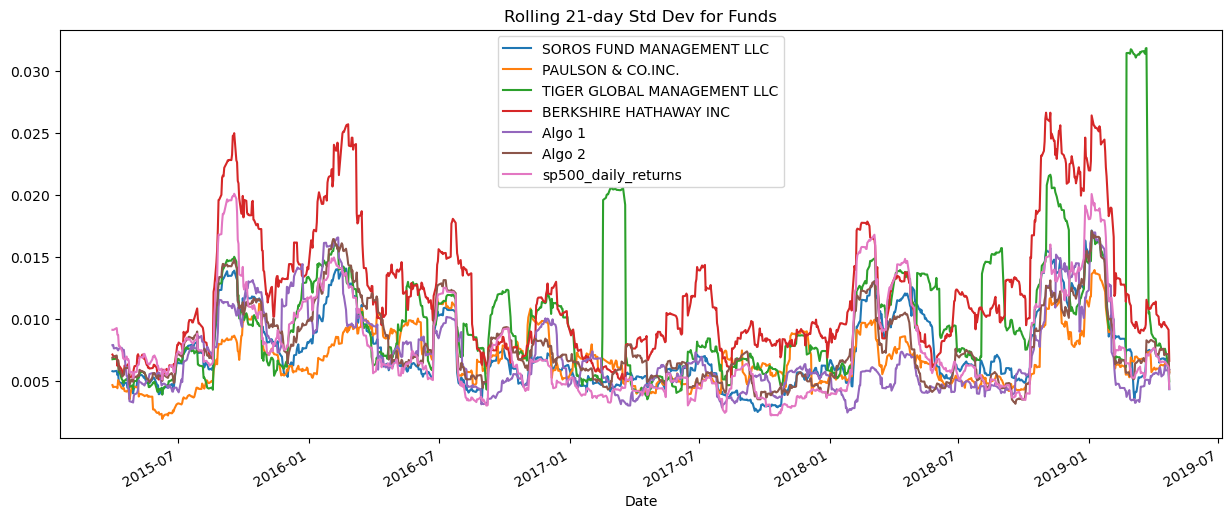

In [510]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_df=combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_df.plot(title="Rolling 21-day Std Dev for Funds",figsize=[15,6])

### Calculate and plot the correlation

<Axes: >

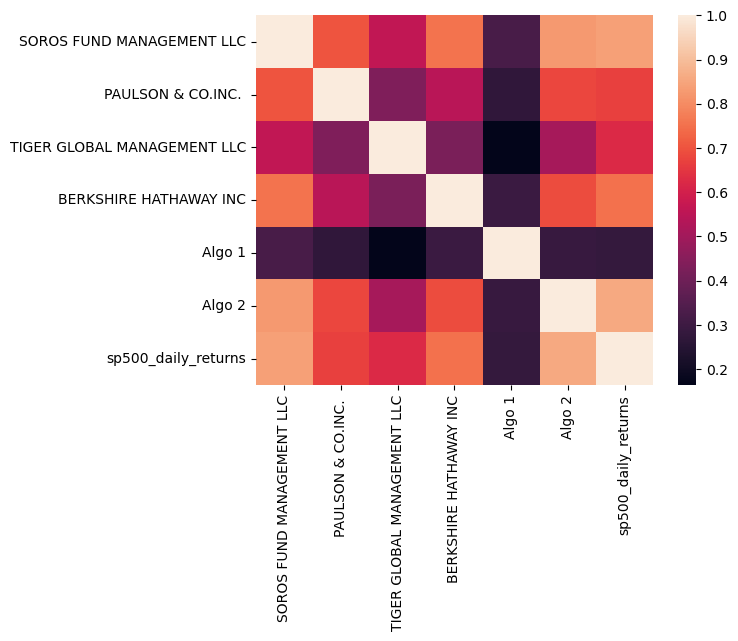

In [511]:
# Calculate the correlation
correlation=combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Rolling 60d Beta for Berkshire Hathaway'}, xlabel='Date'>

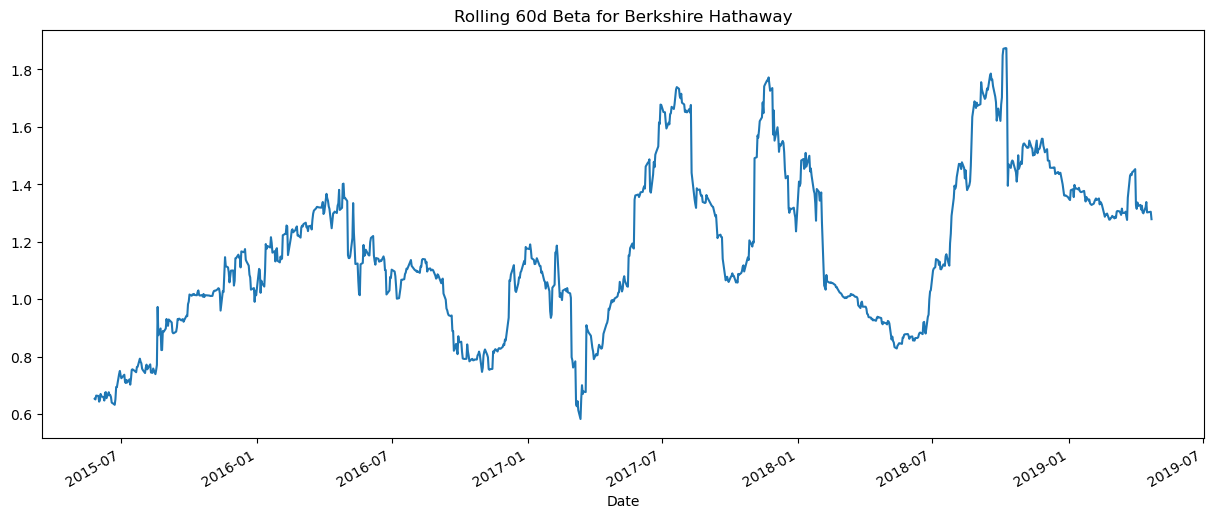

In [512]:
# Calculate covariance of a single portfolio
covariance_bk=combined_df['BERKSHIRE HATHAWAY INC'].rolling(60).cov(combined_df['sp500_daily_returns'])
# Calculate variance of S&P 500
variance = combined_df['sp500_daily_returns'].rolling(60).var()
# Computing beta
beta_bk=covariance_bk/variance
# Plot beta trend
beta_bk.plot(title="Rolling 60d Beta for Berkshire Hathaway",figsize=[15,6])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': '21d halflife EMW of the StdDev of Berkshire Hathaway'}, xlabel='Date'>

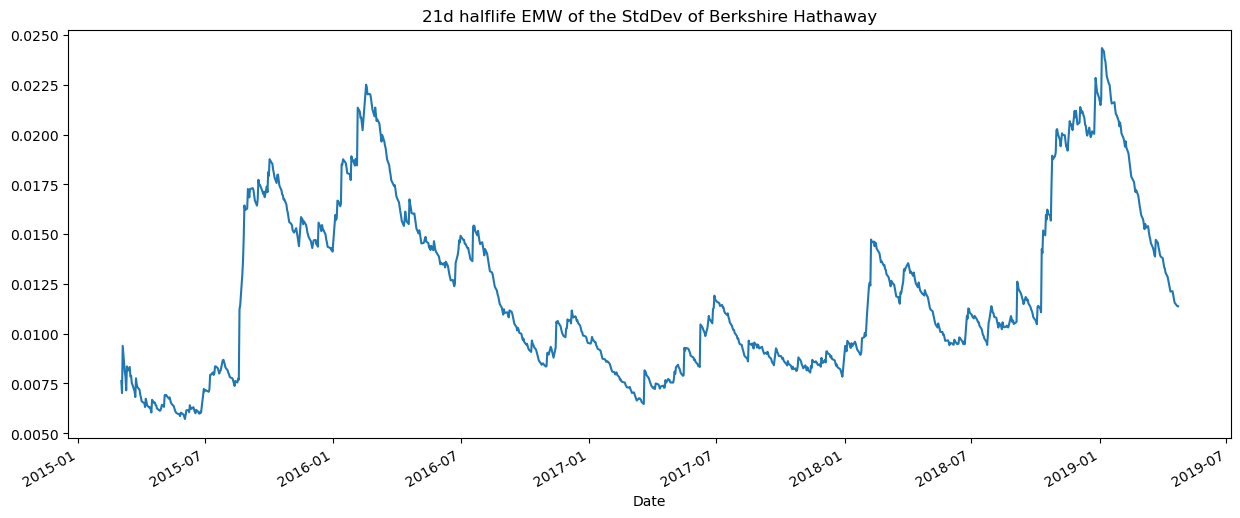

In [513]:
# Use `ewm` to calculate the rolling window
ewa_bk=combined_df['BERKSHIRE HATHAWAY INC'].ewm(halflife=21).std()
ewa_bk.plot(title="21d halflife EMW of the StdDev of Berkshire Hathaway",figsize=[15,6])

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [514]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500_daily_returns            0.648267
dtype: float64

<Axes: title={'center': 'Sharpe Ratios for Various Funds'}>

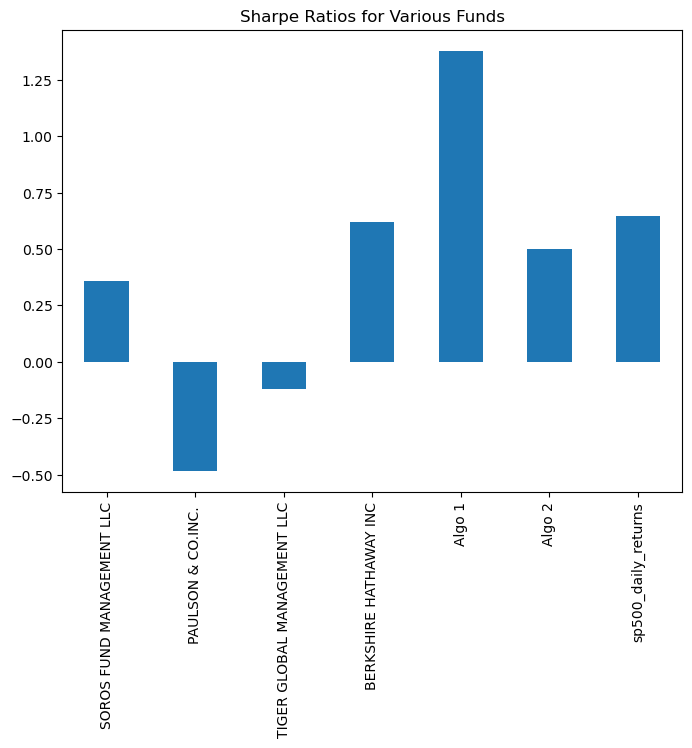

In [515]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar',title='Sharpe Ratios for Various Funds',figsize=[8,6])

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The algorithmic fund name "Algo 1" clearly has a lower Beta ratio than the other funds that are being considered. This means that it has a very low volatility versus the other funds.

Here are the Beta ratios for the various funds: 
| Fund | Beta ratio |
| ----------- | ----------- |
|SOROS FUND MANAGEMENT LLC|      0.773375|
|PAULSON & CO.INC.|              0.549886|
|TIGER GLOBAL MANAGEMENT LLC|    0.794653|
|BERKSHIRE HATHAWAY INC|         1.134789|
|Algo 1|                         0.248991|
|Algo 2|                         0.837535|
|sp500_daily_returns|            1.000000|

On the other hand, it has a much higher Sharpe ratio than the other funds indicating that "Algo 1". Sharpe Ratio is a measure of risk-adjusted performance. The high Sharpe Ratio for "Algo 1" indicates it has excellent risk-adjusted returns.

Here are the Sharpe ratio for the funds:
| Fund | Sharpe ratio |
| ----------- | ----------- |
|SOROS FUND MANAGEMENT LLC|      0.614773|
|PAULSON & CO.INC.|             -0.404520|
|TIGER GLOBAL MANAGEMENT LLC|   -0.888148|
|BERKSHIRE HATHAWAY INC|         1.242706|
|Algo 1|                         1.223376|
|Algo 2|                         0.747427|

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [516]:
# Reading the data for all of the stocks at once
custom_stocks_df=pd.read_csv('./Resources/FinTech Portfolio - Sheet2.csv    ',index_col='Datetime',parse_dates=True)
# Google Finance includes the time of close in the date, so the time has to be stripped out
custom_stocks_df.index=custom_stocks_df.index.date
# The date still appears to be a Python date, so it needs to be in Pandas datetime type
custom_stocks_df.index=pd.to_datetime(custom_stocks_df.index)
# Adding index title to match with other dataframe for the join later
custom_stocks_df.index.name = 'Date'
# Display first 5 
custom_stocks_df.head()

,V,FI,TREE,SQ
Date,,,,
2017-01-03,79.50,53.67,98.35,13.81
2017-01-04,80.15,54.33,104.05,14.25
2017-01-05,81.09,54.31,102.00,14.56
2017-01-06,82.21,54.92,100.75,15.00
2017-01-09,81.75,54.05,101.45,15.06


<Axes: title={'center': 'Stock Prices for My Portfolio'}, xlabel='Date'>

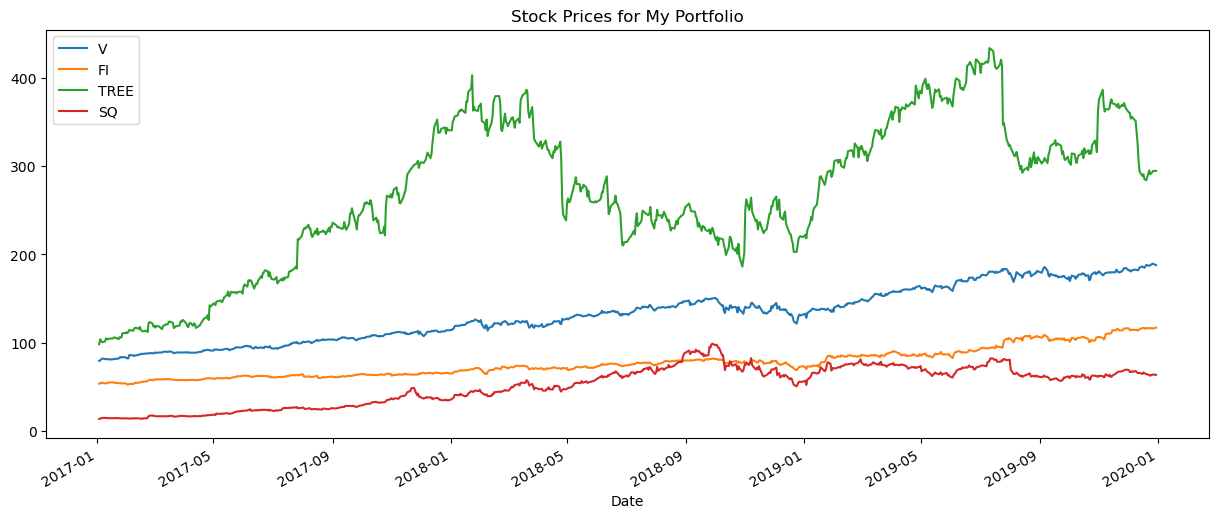

In [517]:
# Visualizing the stocks so I know what to expect from their performance (pretty good!)
custom_stocks_df.plot(title="Stock Prices for My Portfolio",figsize=[15,6])

In [518]:
# Calculate daily returns and drop NAs
daily_returns_df=custom_stocks_df.pct_change().dropna()

# Display sample data
daily_returns_df.head()

,V,FI,TREE,SQ
Date,,,,
2017-01-04,0.008176,0.012297,0.057956,0.031861
2017-01-05,0.011728,-0.000368,-0.019702,0.021754
2017-01-06,0.013812,0.011232,-0.012255,0.030220
2017-01-09,-0.005595,-0.015841,0.006948,0.004000
2017-01-10,-0.005382,0.001295,0.035485,-0.009960


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

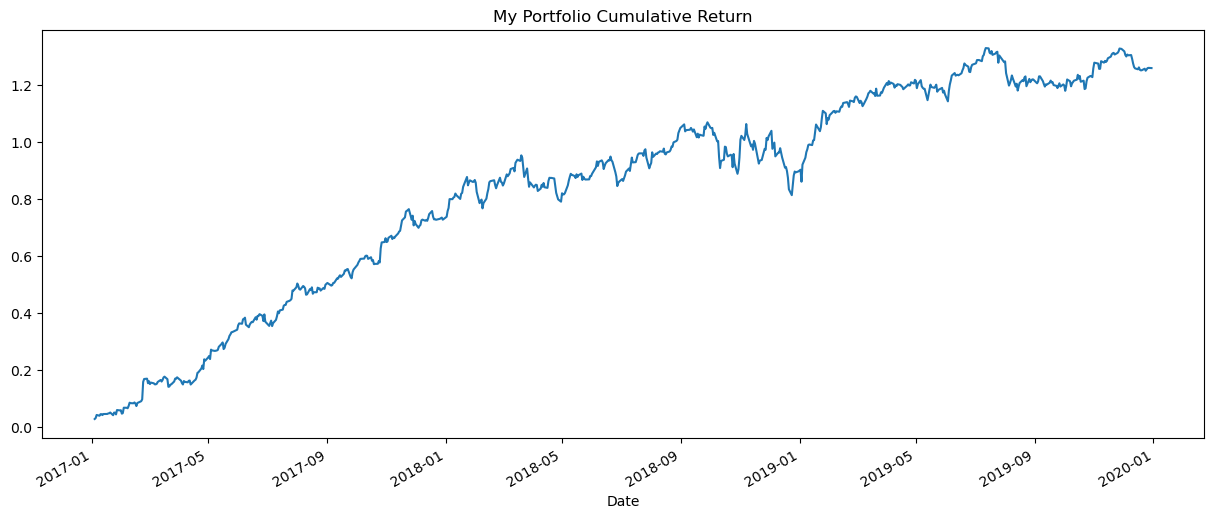

In [519]:
# Set weights equally between the 4
weights = [1/4, 1/4, 1/4, 1/4]

# Calculate portfolio return
portfolio_df=daily_returns_df.dot(weights)

# Display sample data
portfolio_df.cumsum().plot(title='My Portfolio Cumulative Return',figsize=[15,6])
# Set name of Portfolio series 
portfolio_df.name="My_Portfolio"

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [520]:
# Converting from Series to DataFrame for join
portfolio_df=pd.DataFrame(portfolio_df)
# Joining to the other funds' DataFrame for comparison
combined_df=combined_df.join(portfolio_df).dropna()


In [521]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
#combined_df=combined_df.dropna()
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_daily_returns,My_Portfolio
Date,,,,,,,,
2017-01-04,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,0.005722,0.027573
2017-01-05,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,-0.000771,0.003353
2017-01-06,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,0.003517,0.010752
2017-01-09,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,-0.003549,-0.002622
2017-01-10,-0.001490,0.000394,-0.000718,0.010586,0.007669,0.006618,0.000000,0.005360


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [522]:
# Calculate the annualized `std`
print("Here's the annual standard deviation for the funds:")
print(combined_df.std()*(252)**0.5)

Here's the annual standard deviation for the funds:
SOROS FUND MANAGEMENT LLC      0.124795
PAULSON & CO.INC.              0.107732
TIGER GLOBAL MANAGEMENT LLC    0.188647
BERKSHIRE HATHAWAY INC         0.198369
Algo 1                         0.106695
Algo 2                         0.120169
sp500_daily_returns            0.129174
My_Portfolio                   0.255608
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Rolling 21d StdDev of Funds & My Portfolio'}, xlabel='Date'>

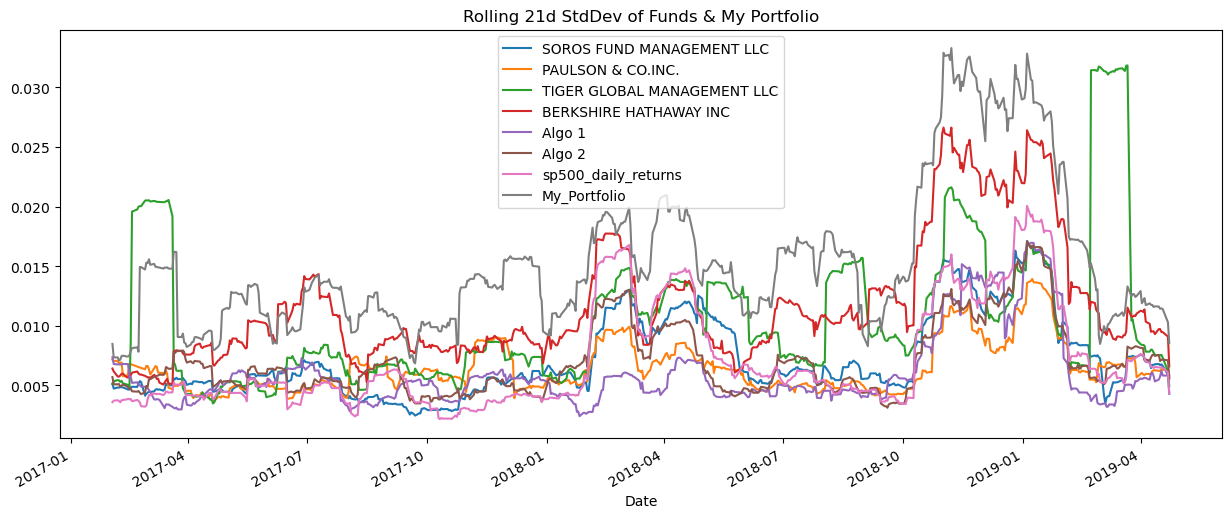

In [523]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_df=combined_df.rolling(21).std()
# Plot the rolling standard deviation
rolling_std_df.plot(title='Rolling 21d StdDev of Funds & My Portfolio',figsize=[15,6])

### Calculate and plot the correlation

<Axes: >

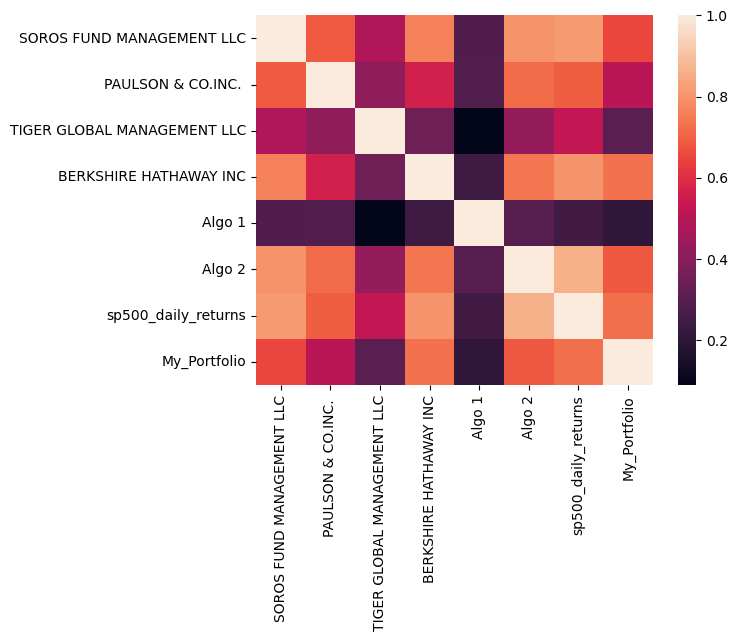

In [524]:
# Calculate the correlation
correlation=combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 60d Beta of Various Funds and My Portfolio'}, xlabel='Date'>

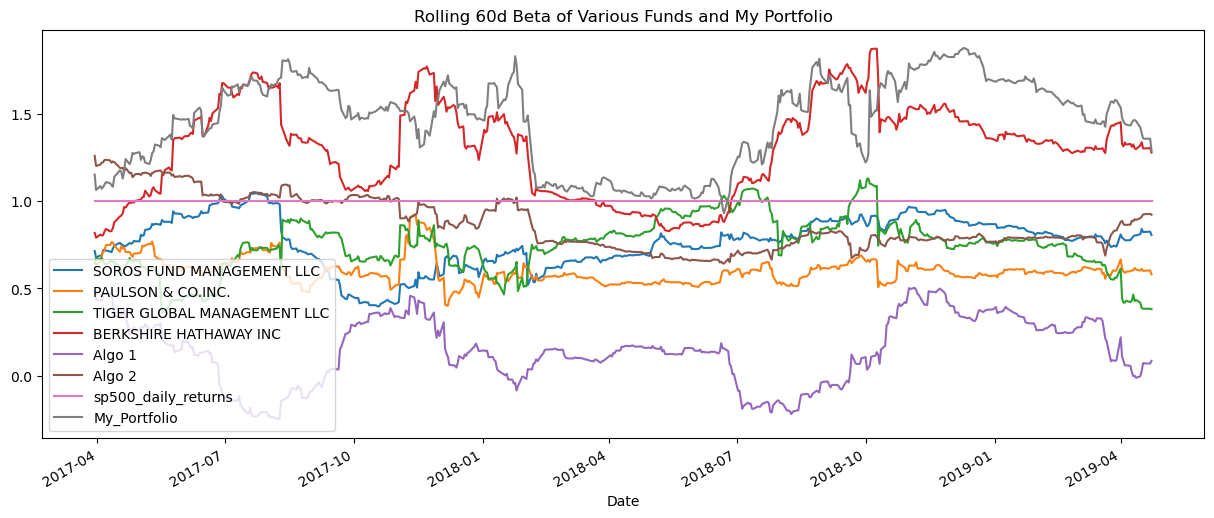

In [525]:

# Calculate variance of S&P 500 on 60d rolling basis and drop NAs
variance = combined_df['sp500_daily_returns'].rolling(window=60).var().dropna()

#Initializing beta and covariance as DataFrames
beta=pd.DataFrame()
covariance=pd.DataFrame()

# FOR loop to achieve calculating the 60d rolling beta for the funds
for each in combined_df.columns:
    covariance[each]=combined_df[each].rolling(window=60).cov(combined_df['sp500_daily_returns'])
    # Computing beta
    beta[each]=covariance[each]/variance
# Plot beta trend
beta.plot(title="Rolling 60d Beta of Various Funds and My Portfolio",figsize=[15,6])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [526]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
print("Here are the Sharpe Ratio for the funds:")
print(sharpe_ratios)

Here are the Sharpe Ratio for the funds:
SOROS FUND MANAGEMENT LLC      0.614773
PAULSON & CO.INC.             -0.404520
TIGER GLOBAL MANAGEMENT LLC   -0.888148
BERKSHIRE HATHAWAY INC         1.242706
Algo 1                         1.223376
Algo 2                         0.747427
sp500_daily_returns            0.948652
My_Portfolio                   2.050312
dtype: float64


<Axes: >

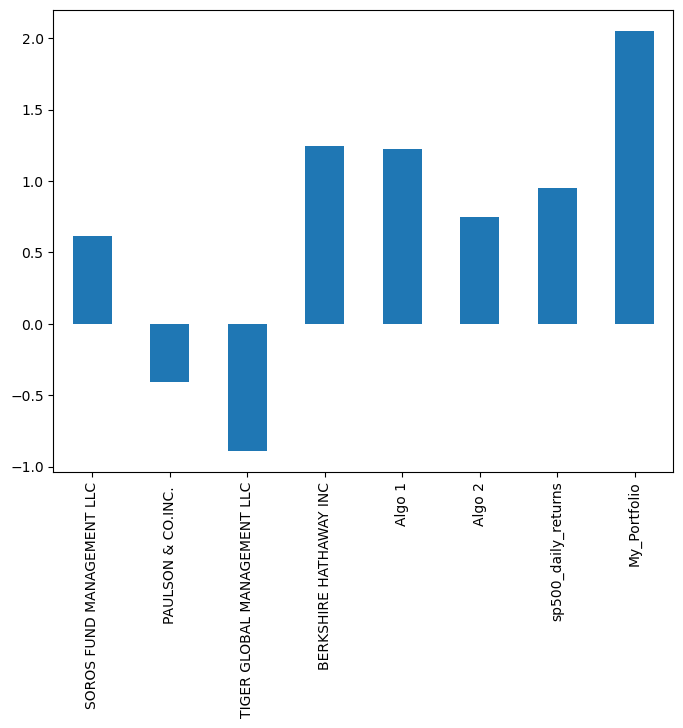

In [527]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar',figsize=[8,6])

### How does your portfolio do?

My Portfolio has the best Sharpe ratio versus the other funds as you can see below. This means it has the highest risk-adjusted return for that time period.

Here are the Sharpe ratio for the funds:
| Fund | Sharpe ratio |
| ----------- | ----------- |
|SOROS FUND MANAGEMENT LLC|      0.614773|
|PAULSON & CO.INC.|             -0.404520|
|TIGER GLOBAL MANAGEMENT LLC|   -0.888148|
|BERKSHIRE HATHAWAY INC|         1.242706|
|Algo 1|                         1.223376|
|Algo 2|                         0.747427|
|My_Portfolio|                   2.050312|